# Section 3: One-way ANOVA

Previously, we used t-test to compare the mean of two groups. Sometimes, we want to compare means of several groups. Then, we use one-way ANOVA. Here,

Null hypothesis: All means are the same

Alternative: At least one of the population means differ

Here, getting a low p-value indicates that AT LEAST one of the population means differ, not saying that ALL the population means are different.

The Python code to one-way ANOVA is:
```Python
from scipy import stats

f, p = stats.f_oneway(list of data)

print("F:", f)
print("p:", p)
```

We will be using the example of BMI values that we examined before:

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
df = pd.read_csv('Data/NHANES.csv')

In [16]:
df = df.dropna(subset=['BMI'])

In [24]:
white = df['Race3'] == 'White'
black = df['Race3'] == 'Black'
hispanic = df['Race3'] == 'Hispanic'
asian = df['Race3'] == 'Asian'
mexican = df['Race3'] == 'Mexican'
other = df['Race3'] == 'Other'

In [25]:
white_df = df[white]
black_df = df[black]
hispanic_df = df[hispanic]
asian_df = df[asian]
mexican_df = df[mexican]
other_df = df[other]

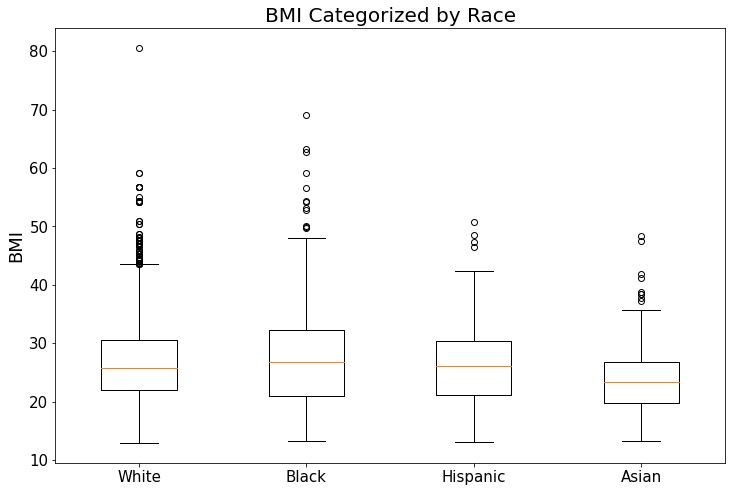

In [19]:
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([white_df['BMI'], black_df['BMI'], hispanic_df['BMI'], asian_df['BMI']])
plt.title('BMI Categorized by Race', fontsize=20)
axs.set_xticklabels(['White', 'Black', 'Hispanic', 'Asian'])
axs.set_ylabel('BMI', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [26]:
f, p = stats.f_oneway(white_df['BMI'], black_df['BMI'], hispanic_df['BMI'], asian_df['BMI'], mexican_df['BMI'],
                     other_df['BMI'])

print("F:", f)
print("p:", p)

F: 11.76857781607841
p: 2.474067847059599e-11


Alternatively, you can use the following code to get the ANOVA table from the one-way ANOVA:

```Python
model = ols('Value ~ C(Factor)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table
```
Where `Value` column includes the data, and `Factor` column includes the factor that you would like to examine.

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('BMI ~ C(Race3)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Race3),3083.532096,5.0,11.768578,2.474068e-11
Residual,253000.714176,4828.0,NaN,NaN


How do we report this?

In [22]:
df['Race3'].value_counts()

White       3047
Black        568
Mexican      452
Hispanic     340
Asian        277
Other        150
Name: Race3, dtype: int64